In [2]:
import pandas as pd

In [18]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [9]:
% matplotlib inline

In [4]:
click_dat = pd.read_csv('click.csv')

In [5]:
click_dat.head()

,x,y
0,235,591
1,216,539
2,148,413
3,35,310
4,85,308


In [89]:
train_y = click_dat.y

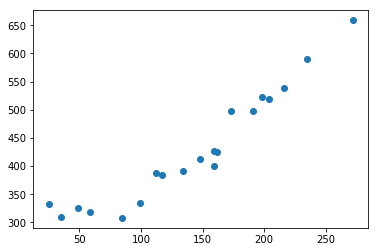

In [15]:
plt.plot(click_dat['x'], click_dat['y'], 'o')

## 2.2 1次関数として実装

In [69]:
theta0 = np.random.rand()
theta1 = np.random.rand()
def f(x):
    return theta0 + theta1 * x
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [70]:
# standardize
mu = click_dat['x'].mean()
sigma = click_dat['x'].std()
def standardize(x):
    return (x - mu) / sigma
train_z = standardize(click_dat.x)

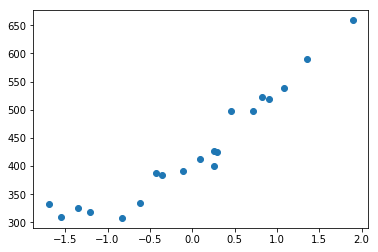

In [71]:
plt.plot(train_z, click_dat.y, 'o')

In [72]:
# update param 

ETA = 1e-3

# 誤算の差分
diff = 1

# 更新回数
count = 0

# 学習を繰り返す
error = E(train_z, click_dat.y)

while diff > 1e-3:
    tmp0 = theta0 - ETA * np.sum(f(train_z) - click_dat.y)
    tmp1 = theta1 - ETA * np.sum((f(train_z) - click_dat.y) * train_z)
    
    theta0 = tmp0
    theta1 = tmp1
    
    current_error = E(train_z, click_dat.y)
    diff = error - current_error
    error = current_error
    
    count += 1
    log = '{}回目： theta0 = {:.3f}, theta1 = {:.3f}, diff = {:.4f}'
    print(log.format(count, theta0, theta1, diff))

1回目： theta0 = 8.809, theta1 = 2.307, diff = 76108.1621
2回目： theta0 = 17.216, theta1 = 4.085, diff = 73100.6623
3回目： theta0 = 25.454, theta1 = 5.830, diff = 70212.0193
4回目： theta0 = 33.528, theta1 = 7.541, diff = 67437.5353
5回目： theta0 = 41.441, theta1 = 9.220, diff = 64772.6984
6回目： theta0 = 49.195, theta1 = 10.867, diff = 62213.1748
7回目： theta0 = 56.794, theta1 = 12.483, diff = 59754.8023
8回目： theta0 = 64.241, theta1 = 14.068, diff = 57393.5830
9回目： theta0 = 71.539, theta1 = 15.623, diff = 55125.6771
10回目： theta0 = 78.691, theta1 = 17.149, diff = 52947.3967
11回目： theta0 = 85.701, theta1 = 18.645, diff = 50855.1993
12回目： theta0 = 92.570, theta1 = 20.113, diff = 48845.6829
13回目： theta0 = 99.301, theta1 = 21.553, diff = 46915.5796
14回目： theta0 = 105.898, theta1 = 22.966, diff = 45061.7509
15回目： theta0 = 112.363, theta1 = 24.352, diff = 43281.1821
16回目： theta0 = 118.699, theta1 = 25.711, diff = 41570.9780
17回目： theta0 = 124.908, theta1 = 27.045, diff = 39928.3575
18回目： theta0 = 130.993, t

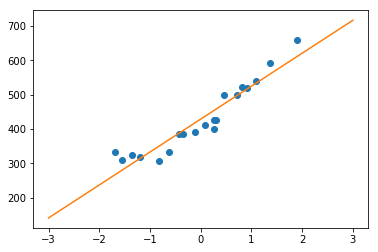

In [74]:
x = np.linspace(-3, 3, 100)
plt.plot(train_z, click_dat.y, 'o')
plt.plot(x, f(x))

## 2.4 多項式回帰の実装
$$
f_\theta(x) = \theta_0 + \theta_1 x + \theta_2 x^2
$$

In [82]:
theta = np.random.rand(3)

# train data to matrix
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2]).T

X = to_matrix(train_z)

# pred func
def f(x):
    return np.dot(x, theta)

# diff error
diff = 1

# loop learn
error = E(X, click_dat.y)
while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - click_dat.y, X)
    
    current_error = E(X, click_dat.y)
    diff = error - current_error
    error = current_error
    print('theta:{}, diff : {}'.format(theta, diff))



theta:[ 8.63553414  2.6074945   9.22466827], diff : 145678.2954333478
theta:[ 16.87055476   4.39203742  17.24711097], diff : 132149.1621358539
theta:[ 24.78844856   6.1529785   24.79993349], diff : 119942.00819971063
theta:[ 32.40448085   7.89016295  31.90759665], diff : 108926.05742205703
theta:[ 39.7331469    9.60347037  38.59330924], diff : 98983.51444356935
theta:[ 46.78821108  11.29281245  44.87909187], diff : 90008.27490020846
theta:[ 53.58274412  12.95813083  50.78583767], diff : 81904.76378827565
theta:[ 60.12915832  14.59939511  56.33336981], diff : 74586.88929643808
theta:[ 66.43924112  16.21660092  61.54049613], diff : 67977.10062564362
theta:[ 72.52418688  17.80976813  66.42506098], diff : 62005.53945909219
theta:[ 78.39462698  19.37893918  71.00399438], diff : 56609.27577218518
theta:[ 84.06065855  20.9241774   75.29335872], diff : 51731.61959802348
theta:[ 89.53187156  22.4455656   79.30839304], diff : 47321.501197538106
theta:[ 94.81737466  23.94320455  83.06355506], dif

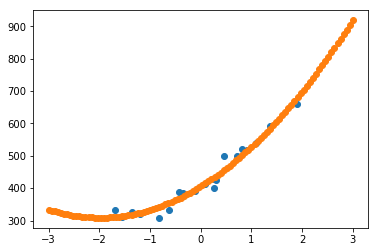

In [84]:
x = np.linspace(-3, 3, 100)
plt.plot(train_z, click_dat.y, 'o')
plt.plot(x, f(to_matrix(x)), 'o')

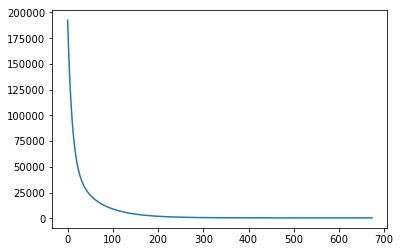

In [94]:
# MSE : mean square error
def MSE(x, y):
    return (1 / x.shape[0]) * np.sum((y - f(x)) ** 2)

theta = np.random.rand(3)

# MSEの履歴
errors = []

diff = 1

errors.append(MSE(X, click_dat.y))
while diff > 1e-2:
    theta = theta - ETA * np.dot(f(X) - click_dat.y, X)
    errors.append(MSE(X, click_dat.y))
    diff = errors[-2] - errors[-1]
    
# plot error
x = np.arange(len(errors))
plt.plot(x, errors)

## 2.5 確率的勾配降下法の実装


# 3. パーセプトロン

## 3.1 パーセプトロンの実装

# 4. ロジスティック回帰

## 4.1 ロジスティック回帰の実装

## 4.2 ロジスティック回帰の確率的勾配降下法の実装

# 5. 正則化

## 5.2 正則化しない場合

## 5.3 正則化した場合